In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
folder_path = "data/210417_Halbleiter/linearität"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.TKA')]

data = {}

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    file_data = np.loadtxt(file_path, delimiter=',', skiprows=2)
    data[int(csv_file.replace('.TKA', ''))] = file_data


In [4]:
def gauss_function(x, a, x0, sigma):
    return a * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def python_to_latex(num):
    """
    Konvertiert eine Python-Wissenschaftliche Notation eines Floats in LaTeX-Code
    """
    str_num = "{:.2E}".format(num)
    str_num_parts = str_num.split("E")
    float_part = str(float(str_num_parts[0]))
    exp_part = str(int(str_num_parts[1]))
    latex_num = "{} \\times 10^{{{}}}".format(float_part, exp_part)
    return latex_num


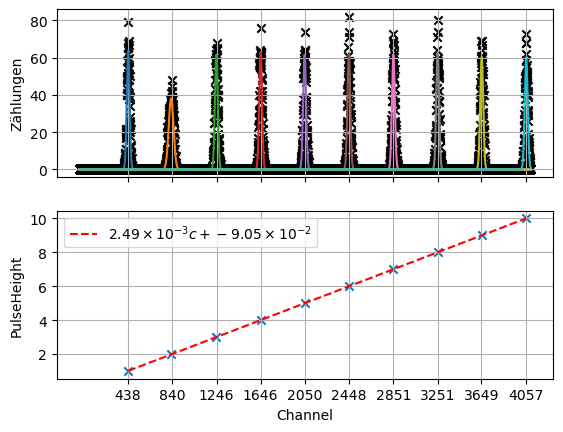

In [7]:
from scipy.optimize import curve_fit

fig, (ax, ax2) = plt.subplots(2,1, sharex=True)
max_channels = []
ax.set_xticks([])
for d in sorted(data.keys()):
    channels = np.arange(2, len(data[d]) + 2)
    maximum = np.argmax(data[d])
    ax.scatter(channels, data[d], color ='k', marker='x')

    p0 = [data[d].max(), channels[data[d].argmax()], 50]
    coeff, _ = curve_fit(gauss_function, channels, data[d], p0=p0, maxfev=10000)

    ax.plot(channels, gauss_function(channels, *coeff), label=f"PH = {d}")
    ax.set_xticks(list(ax.get_xticks()) + [channels[maximum]])
    max_channels.append(coeff[1])
#ax.legend()
ax2.grid()
ax.grid()
#ax.legend()
ax2.scatter(max_channels, sorted(data.keys()), marker='x')

p = np.polyfit(max_channels, sorted(data.keys()), 1)
f = np.poly1d(p)
ax2.plot(max_channels, f(max_channels), 'r--', label=f'${python_to_latex(p[0])}c+{python_to_latex(p[1])}$')
ax.set(ylabel='Zählungen')
ax2.set(xlabel="Channel", ylabel='PulseHeight')
ax2.legend()
fig.savefig("out/linearität.png")